In [32]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches
import os
from sklearn.model_selection import GridSearchCV

In [33]:
path = 'ch3classificationex1.txt'
data = pd.read_csv(path, header=None)
# 不需要使用独热编码

In [34]:
type(data.values)

numpy.ndarray

In [35]:
# 划分数据集
x, y = np.split(data.values, (2,), axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.5, random_state=0)

In [36]:
# 逻辑斯蒂回归
# 设计管线
lr = Pipeline([('sc', StandardScaler()),
                   ('poly',PolynomialFeatures(degree=3)),
                   ('clf', LogisticRegression())]) 

lr.fit(x_train, y_train.ravel())
y_hat = lr.predict(x_test)
y_hat_prob = lr.predict_proba(x_test)
np.set_printoptions(suppress=True)
print ('y_hat = \n', y_hat)
#print ('y_hat_prob = \n', y_hat_prob)
print (u'准确度：%.2f%%' % (100*np.mean(y_hat == y_test.ravel())))

y_hat = 
 [0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1.
 0. 0.]
准确度：94.00%


y_value:   [1 0 0 0 1 1 1 1 0 1 0 0 0 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 0 1 0 0 1 0 1 1 0 1 0 0]


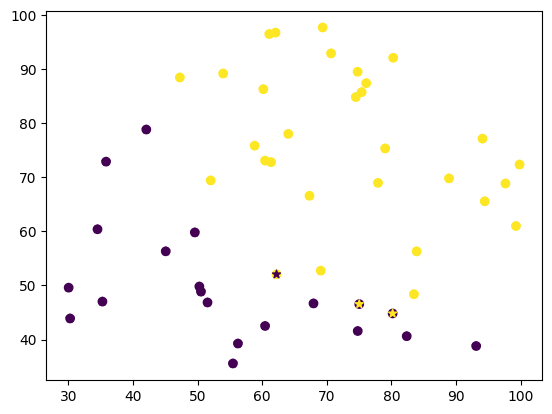

In [37]:
# 画图
y_val = np.array([value for (index, value) in enumerate(y_hat.ravel())])
y_val = y_val.astype(int)
y_test= np.array([value for (index, value) in enumerate(y_test.ravel())])
y_test= y_test.astype(int)
print("y_value:  ",y_test)
plt.scatter(x_test[:, 0], x_test[:, 1],marker = 'o', c = y_val.astype(int))
plt.scatter(x_test[:, 0], x_test[:, 1],marker = '*', c = y_test)
plt.show()

In [38]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# LDA回归
lda = LinearDiscriminantAnalysis()
lda.fit(x_train,y_train)
y_hat = lda.predict(x_test)
print ("y_hat:  ",y_hat)
param = lda.coef_
print("param: ",param)
score=100*np.mean(y_hat == y_test.ravel())
print("score:  ", score)

y_hat:   [1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1.
 0. 0.]
param:  [[0.14199264 0.10821235]]
score:   90.0


/root/miniconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


y_test:   [1 0 0 0 1 1 1 1 0 1 0 0 0 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 0 1 0 0 1 0 1 1 0 1 0 0]


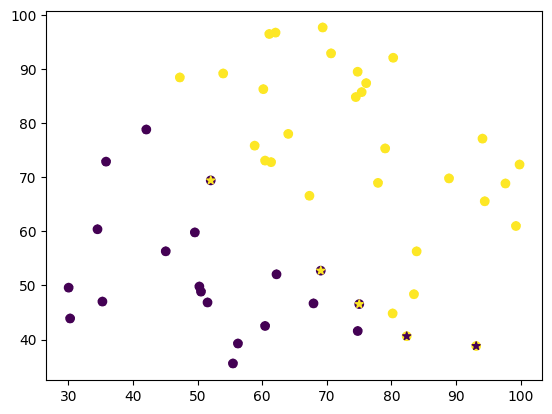

In [39]:
#plot
y_val = np.array([value for (index, value) in enumerate(y_hat.ravel())])
y_val = y_val.astype(int)
y_test= np.array([value for (index, value) in enumerate(y_test.ravel())])
y_test= y_test.astype(int)
print("y_test:  ",y_test)
plt.scatter(x_test[:, 0], x_test[:, 1],marker = 'o', c = y_val.astype(int))
plt.scatter(x_test[:, 0], x_test[:, 1],marker = '*', c = y_test)
plt.show(
    
)